In [12]:
#Train LR To predict churn
from src.features.pipeline import loading_model_df, build_manual_pipeline
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = loading_model_df()
X_df = df.drop(columns=['customerID', 'churn_flag'])
y = df['churn_flag'].values
X, feature_names = build_manual_pipeline(X_df)
print("Overall y distribution:", np.unique(y, return_counts=True))


Overall y distribution: (array([0, 1]), array([5174, 1869]))


In [3]:
mask = ~np.isnan(X).any(axis=1)
X_clean = X[mask]
y_clean = y[mask]

print("Dropped", X.shape[0] - X_clean.shape[0], "rows containing NaNs")
print("New Shape:", X_clean.shape)

Dropped 0 rows containing NaNs
New Shape: (7043, 20)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, stratify=y, random_state = 42
    
)

In [5]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_proba = model.predict_proba(X_test)[:,1]
print("ROC-AUC", roc_auc_score(y_test, y_proba))
precision, recall, thresholds = precision_recall_curve(y_test,y_proba)

ROC-AUC 0.839798238135834


In [9]:
no_skill = y_test.mean()

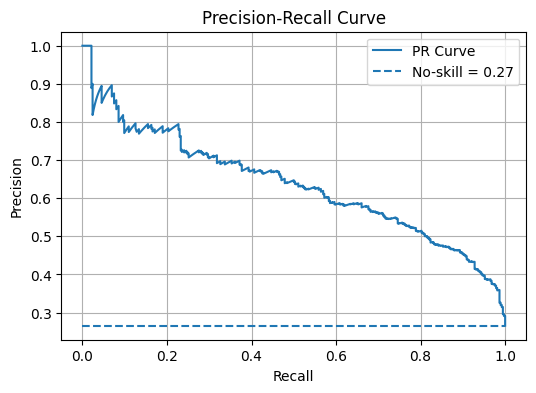

In [10]:
plt.figure(figsize=(6,4))
plt.plot(recall,precision, label="PR Curve")
plt.hlines(no_skill,0,1, linestyles='--', label=f"No-skill = {no_skill:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
coefs = pd.DataFrame({
    'feature' : feature_names,
    'coefficents' : model.coef_[0]    
}).sort_values('coefficents', ascending=False)

display(coefs.head(10))
display(coefs.tail(10))

,feature,coefficents
4,InternetService_Fiber optic,1.166714
9,PaymentMethod_Electronic check,0.439082
19,StreamingMovies_Yes,0.429710
18,StreamingTV_Yes,0.396578
13,tenure_bucket_49-72,0.288224
2,TotalCharges,0.226700
16,DeviceProtection_Yes,0.042687
8,PaymentMethod_Credit card (automatic),0.025187
10,PaymentMethod_Mailed check,0.006937
15,OnlineBackup_Yes,-0.083132


,feature,coefficents
3,avg_monthly_charge,-0.094419
12,tenure_bucket_25-48,-0.190497
1,MonthlyCharges,-0.207954
17,TechSupport_Yes,-0.302217
11,tenure_bucket_13-24,-0.377110
14,OnlineSecurity_Yes,-0.384504
6,Contract_One year,-0.825157
0,tenure,-0.970146
5,InternetService_No,-1.241062
7,Contract_Two year,-1.633176


In [14]:
y_pred = (y_proba >= 0.5).astype(int)
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.912     0.718     0.803      1035
           1      0.508     0.807     0.624       374

    accuracy                          0.742      1409
   macro avg      0.710     0.763     0.714      1409
weighted avg      0.805     0.742     0.756      1409

